In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('../Data/train_20k.csv', header=None)
test = pd.read_csv('../Data/test_1k.csv', header=None)

In [6]:
targetCount = []
for i in sorted(train[0].unique()):
    print(i, ":", len(train[train[0] == i]))
    targetCount.append(len(train[0] == i))

print(targetCount)

0 : 1994
1 : 2281
2 : 1929
3 : 2076
4 : 1945
5 : 1776
6 : 1971
7 : 2093
8 : 1922
9 : 2014
[20001, 20001, 20001, 20001, 20001, 20001, 20001, 20001, 20001, 20001]


In [5]:
import numpy as np
np.min(targetCount) / np.max(targetCount)

1.0

### train과 test를 Target(Label)과 Feature(Data)로 분리하고 표준화 하기

In [7]:
train_label = train.loc[:, train.columns == 0]
train_data = train.loc[:, train.columns != 0]
train_data = train_data / 255

test_label = test.loc[:, test.columns == 0]
test_data = test.loc[:, test.columns != 0]
test_data = test_data / 255

# Deep Learning Model 만들기

In [8]:
from tensorflow import keras

In [12]:
model = keras.Sequential()
model.add(keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [13]:
# 모델 구축하기
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
# 데이터 훈련하기
hist = model.fit(np.array(train_data), np.array(train_label), epochs=10)

Epoch 1/10


2023-02-28 15:22:44.640193: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-28 15:22:44.823435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


626/626 [==============================] - 6s 6ms/step - loss: 0.3136 - accuracy: 0.9100
Epoch 2/10
626/626 [==============================] - 3s 5ms/step - loss: 0.1254 - accuracy: 0.9633
Epoch 3/10
626/626 [==============================] - 3s 5ms/step - loss: 0.0748 - accuracy: 0.9778
Epoch 4/10
626/626 [==============================] - 3s 5ms/step - loss: 0.0478 - accuracy: 0.9868
Epoch 5/10
626/626 [==============================] - 3s 5ms/step - loss: 0.0333 - accuracy: 0.9902
Epoch 6/10
626/626 [==============================] - 3s 5ms/step - loss: 0.0219 - accuracy: 0.9936
Epoch 7/10
626/626 [==============================] - 3s 5ms/step - loss: 0.0174 - accuracy: 0.9950
Epoch 8/10
626/626 [==============================] - 3s 5ms/step - loss: 0.0121 - accuracy: 0.9967
Epoch 9/10
626/626 [==============================] - 3s 5ms/step - loss: 0.0184 - accuracy: 0.9945
Epoch 10/10
626/626 [==============================] - 3s 5ms/step - loss: 0.0062 - accuracy: 0.9985


---
### 테스트 데이터로 평가하기

In [15]:
score = model.evaluate(test_data, test_label)
print('loss =', score[0])
print('accuracy =', score[1])

25/32 [======================>.......] - ETA: 0s - loss: 0.0868 - accuracy: 0.9737

2023-02-28 15:25:41.241581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 8ms/step - loss: 0.0865 - accuracy: 0.9720
loss = 0.08647110313177109
accuracy = 0.9720279574394226


#### predict

In [17]:
np.argmax(model.predict(test_data.loc[0:4]), axis=1)

1/1 [==============================] - 0s 18ms/step


array([7, 2, 1, 0, 4])

#### 번회 : image 만들기

In [24]:
train1 = train.loc[:, train.columns != 0]
train1.shape

(20001, 784)

In [19]:
from PIL import Image

In [25]:
abc = np.array(train1.iloc[50]).reshape(28,28)
abc.shape

(28, 28)

In [26]:
# Image 만들기
image = Image.fromarray((abc).astype(np.uint8))
image

In [27]:
# image 저장하기
image.save('../Data/mnist_test_3.jpg', 'JPEG')

---
### 이미지를 불러서 predict 해보기

In [28]:
img = Image.open('../Data/mnist_test_3.jpg')
img

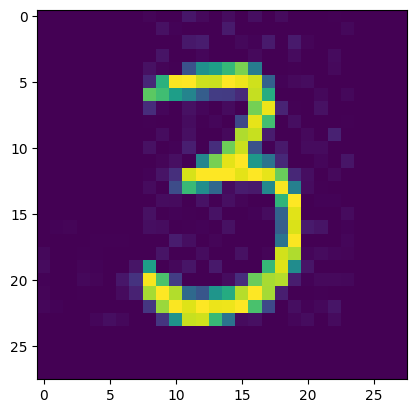

In [29]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [30]:
# image를 numpy 배열로 변환
imgArray = np.array(img)
imgArray = imgArray / 256
imgArray.shape

(28, 28)

In [31]:
# image를 1차원 배열로 변경
imgArray2 = imgArray.reshape(-1)
imgArray2.shape

(784,)

In [44]:
np.argmax(model.predict(pd.DataFrame(imgArray2).T), axis=1)

1/1 [==============================] - 0s 11ms/step


array([3])